In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Setup data

Read in data and replace unknown values with NA 

In [2]:
wine_data_path = "../data/winemag-data-130k-v2.csv" 

missing_values = ["n/a", "na", "--", "false"]
raw_wine_data = pd.read_csv(wine_data_path, na_values = missing_values)

Select columns relevant for our hypothesis and remove the values with NA

In [38]:
filtered_wine_data = raw_wine_data[['description', 'points', 'price']]
clean_wine_data = filtered_wine_data.dropna()

Add a new column with the length of the description and sentiment

In [41]:
clean_wine_data['description_length'] = clean_wine_data['description'].apply(lambda x: len(str(x).split(" ")))
clean_wine_data['description_sentiment'] = clean_wine_data['description'].apply(lambda x: TextBlob(x).sentiment[0] + 1)

Remove the rows that don't have a good review(description that specifiies where the wine is made)

In [42]:
clean_wine_data = clean_wine_data.loc[clean_wine_data['description_length'] > 6]

# Correlation matrix

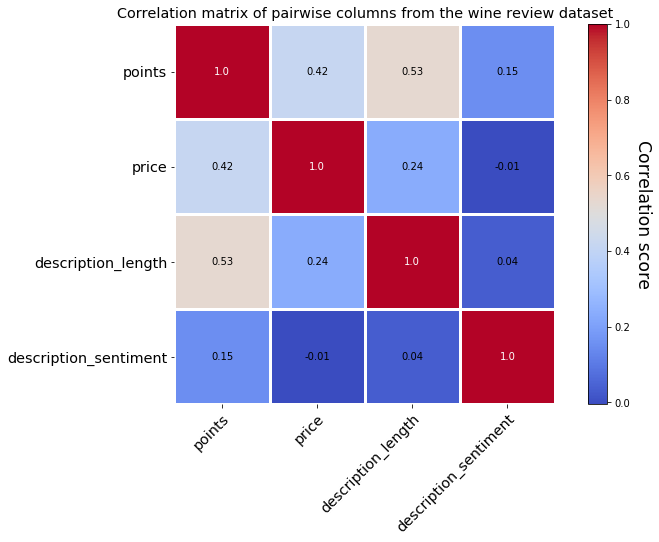

In [64]:
corr = clean_wine_data.corr()
columns = list(corr)
data = np.around(corr.values, decimals=2)

fig, ax = plt.subplots(figsize=(12, 7))
im = ax.imshow(corr, cmap='coolwarm')

# # We want to show all ticks...
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(columns)))

ax.set_xticklabels(columns, fontsize='x-large')
ax.set_yticklabels(columns,fontsize='x-large')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(columns)):
        text = ax.text(j, i, data[i][j],
                       ha="center", va="center", color="k" if data[i][j] < 0.55 else "w")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation score', rotation=-90, va="bottom", fontsize='xx-large')

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)
    
ax.set_title("Correlation matrix of pairwise columns from the wine review dataset", fontsize='x-large')
plt.show()


In [50]:
clean_wine_data.corr()

,points,price,description_length,description_sentiment
points,1.000000,0.416186,0.532549,0.153667
price,0.416186,1.000000,0.236032,-0.005353
description_length,0.532549,0.236032,1.000000,0.035630
description_sentiment,0.153667,-0.005353,0.035630,1.000000
